# Tutorial on Analyzers for Education Language Data

Welcome to this tutorial on using [`edu-toolkit`](https://github.com/rosewang2008/edu_convokit) for analyzing your education language data!
Analyzing your data with `edu-toolkit` can help you understand the language used by your students and educators.
In the [previous tutorial on `Annotator`](https://colab.research.google.com/drive/1rBwEctFtmQowZHxralH2OGT5uV0zRIQw), we learned how to annotate your data.
We will use those annotations to analyze your data in this tutorial.

## Motivation on `Analyzer`

Analysis on education data can happen in many ways.
- 🔍 It can happen **qualitatively** where you look at the data; for example, in the previous tutorial, we annotated the data for `student_reasoning` and you might be interested in looking at the specific instances of student reasoning.
- 📊 It can also happen **quantitatively** where you look at the data in aggregate; for example, you might be interested in the average amount of time the student and educator talk.
- 💬 You might also be interested in **lexically** analyzing the data; for example, you might be interested in what words the student uses the most compared to the educator.
- 📈 Finally, you might be interested in **temporally** analyzing the data; for example, you might be interested in the amount of time the student and educator talk over the course of their interaction.

## 📚 Learning Objectives

In this tutorial, you will learn how to use `Analyzer` to satisfy all these analysis needs. You will learn how to use

1. The Analyzer Modules
    - 🔍 Qualitative Analyzer (<a href="#🔍-qualitative-analysis">Section Link 🔗</a>)
    - 📊 Quantitative Analyzer  (<a href="#📊-quantitative-analysis">Section Link 🔗</a>)
    - 💬 Lexical Analyzer (<a href="#💬-lexical-analysis">Section Link 🔗</a>)
    - 📈 Temporal Analyzer (<a href="#📈-temporal-analysis">Section Link 🔗</a>)
2. The Different Data Entry Points for Analyzer
    - Single Transcript (<a href="#single-transcript">Section Link 🔗</a>)
    - Data Directory (<a href="#data-directory">Section Link 🔗</a>)
    - List of Transcripts (<a href="#multiple-transcripts">Section Link 🔗</a>)

If you are interested in seeing examples of these analyzers on full datasets, please check out our other tutorials where we apply everything to the:
- [NCTE dataset with an elementary math classroom data](https://colab.research.google.com/drive/1k3fn6uY4QRMtPUZN6hpMd6o-0g7fYotg)
- [TalkMoves dataset with a K-12 math classroom data](https://colab.research.google.com/drive/1qt_S3GjxIwXk6ONztbYAHeX8WHy1uxDd)
- [Amber dataset, with 8th/0th grade math tutoring data](https://colab.research.google.com/drive/1Q3anUPcemMils4cz2gwEwDdKCjEdm6T9)

If you want to add additional analysis to `edu-toolkit`, please make a pull request to the [repo](https://github.com/rosewang2008/edu-toolkit/).

Without further ado, let's get started!

## Installation

As always, we will start by installing and importing `edu-toolkit`.


In [ ]:
!pip install git+https://github.com/rosewang2008/edu-toolkit.git

  Cloning https://github.com/rosewang2008/edu-toolkit.git to /tmp/pip-req-build-54oo63w2
  Running command git clone --filter=blob:none --quiet https://github.com/rosewang2008/edu-toolkit.git /tmp/pip-req-build-54oo63w2
  Resolved https://github.com/rosewang2008/edu-toolkit.git to commit 2c36eabaf3d4dff1d8c1e89ae4f175ec80617f7e
  Preparing metadata (setup.py) ... done


In [ ]:
from edu_convokit.analyzers import (
    QualitativeAnalyzer,
    QuantitativeAnalyzer,
    LexicalAnalyzer,
    TemporalAnalyzer
)

# For helping us load data
from edu_convokit import utils

## 📑 Data

Let's load the data annotated from the [last tutorial on using the `Annotator` to annotate the data](TODO).
It's a transcript from the [TalkMoves dataset](https://github.com/SumnerLab/TalkMoves).
It contains our annotations on talk time, student reasoning, teacher focusing questions, and conversational uptake.


In [ ]:
!wget https://raw.githubusercontent.com/rosewang2008/edu-toolkit/master/data/annotated_data.csv

data_fname = "annotated_data.csv"
df = utils.load_data(data_fname) # Handles loading data from different file types including: .csv, .xlsx, .json

# Here are the same variables we used in the previous notebook
TEXT_COLUMN = "Sentence"
SPEAKER_COLUMN = "Speaker"
known_replacement_names = [f"[STUDENT_{i}]" for i in range(3)]

# Annotation columns from the previous notebook
TALK_TIME_COLUMN = "talktime"
STUDENT_REASONING_COLUMN = "student_reasoning"
TEACHER_FOCUSING_QUESTION_COLUMN = "focusing_questions"
UPTAKE_COLUMN = "uptake"

df.head()

--2023-12-30 10:43:01--  https://raw.githubusercontent.com/rosewang2008/edu-toolkit/master/data/annotated_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6065 (5.9K) [text/plain]
Saving to: ‘annotated_data.csv.3’

annotated_data.csv. 100%[===================>]   5.92K  --.-KB/s    in 0s      

2023-12-30 10:43:01 (42.6 MB/s) - ‘annotated_data.csv.3’ saved [6065/6065]



,Sentence,Speaker,talktime,student_reasoning,focusing_questions,uptake
0,"I'm wondering which is bigger, one half or two...",T,54,NaN,0.0,NaN
1,Try the purples. Get three purples. It doesn’t...,[STUDENT_0],12,0.0,NaN,NaN
2,What was it? Two thirds?,[STUDENT_1],5,NaN,NaN,NaN
3,It would be like brown or something like that.,[STUDENT_0],9,0.0,NaN,NaN
4,Ok,[STUDENT_1],1,NaN,NaN,NaN


## 🔍 Qualitative Analysis

Let's start by looking at the data qualitatively.
We will use the `QualitativeAnalyzer` to look at the data.

Ever wondered whether there was a quick way to ...
- Look at examples of student reasoning?
- Look at examples of educator focusing questions?
- Look at examples of high conversational uptake by the educator?

This is where the `QualitativeAnalyzer` comes in handy!

Let's start by looking at examples of student reasoning.

In [ ]:
qual_analyzer = QualitativeAnalyzer()

qual_analyzer.print_examples(
    df=df,
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    # We want to look at examples for the reasoning feature
    feature_column=STUDENT_REASONING_COLUMN,
    # We want to look at positive examples of reasoning
    feature_value=1.0,
    # Let's look at 3 examples
    max_num_examples=3
)

student_reasoning: 1.0
>> [STUDENT_1]: one half by one sixth. Cause if you put six ones up to a whole

student_reasoning: 1.0
>> [STUDENT_0]: This would be one third, and this is one half of  dark green, and then it would be bigger by one sixth, because

student_reasoning: 1.0
>> [STUDENT_1]: I mean it's bigger than one tenth, I mean twelfth, one twelfth, one  twelfth.



🎉 Great! This is a quick way to look at examples of student reasoning.

If you're curious in looking at the preceding and succeeding utterances (for context), you can easily do that by specifying the number of lines:

In [ ]:
qual_analyzer.print_examples(
    df=df,
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_REASONING_COLUMN,
    feature_value=1.0,
    max_num_examples=3,
    # We want to look at the previous 2 lines of context
    show_k_previous_lines=2,
    # We also want to look at the next 1 line of context
    show_k_next_lines=1
)

student_reasoning: 1.0
[STUDENT_1] and [STUDENT_0]: is bigger than
T: You both agree?
>> [STUDENT_1]: one half by one sixth. Cause if you put six ones up to a whole
[STUDENT_0]: dark green

student_reasoning: 1.0
T: Ok
[STUDENT_1]: So there’s six sixths
>> [STUDENT_0]: This would be one third, and this is one half of  dark green, and then it would be bigger by one sixth, because
T: Do you both agree with that?

student_reasoning: 1.0
[STUDENT_1]: Yeah, and you take the two dark green rods, those are the halves... And you take two  thirds, and put it up to it, and you take... two sixths, it's bigger than  two sixths. And  in this one, it you take this ...
T 2: Can we go back to that one again?
>> [STUDENT_1]: I mean it's bigger than one tenth, I mean twelfth, one twelfth, one  twelfth.
T 2: How does that work? I'm confused about that. I’m confused about  the little white rods, I am following you right up to that point.



🎉 Awesome! Another handy way to use `QualitativeAnalyzer` is to look at both positive and negative examples of student reasoning.
You can do that by omitting the feature values specification:


In [ ]:
qual_analyzer.print_examples(
    df=df,
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=STUDENT_REASONING_COLUMN,
    max_num_examples=3,
    show_k_previous_lines=2,
    show_k_next_lines=1,
    # feature_value="1.0", Omitted!
)

student_reasoning: 0.0
T: I'm wondering which is bigger, one half or two thirds. Now  before you model it you might think in your head, before you begin  to model it what you is bigger and if so, if one is bigger, by how  much. Why don’t you work with your partner and see what you can  do.
>> [STUDENT_0]: Try the purples. Get three purples. It doesn’t work, try the greens
[STUDENT_1]: What was it? Two thirds?

student_reasoning: 0.0
[STUDENT_0]: Try the purples. Get three purples. It doesn’t work, try the greens
[STUDENT_1]: What was it? Two thirds?
>> [STUDENT_0]: It would be like brown or something like that.
[STUDENT_1]: Ok

student_reasoning: 0.0
[STUDENT_0]: It would be like brown or something like that.
[STUDENT_1]: Ok
>> [STUDENT_0]: We’re not doing the one third, we’re doing two thirds. That is one  third
[STUDENT_1]: First we’ve got to find out what a third of it is. What’s a third of an  orange?

student_reasoning: 1.0
[STUDENT_1] and [STUDENT_0]: is bigger than
T: You both a

🎉 Great! Looking at examples of focusing questions and high conversational uptake will be similar to the example above for student reasoning.

In [ ]:
# Examples of focusing questions.
qual_analyzer.print_examples(
    df=df,
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=TEACHER_FOCUSING_QUESTION_COLUMN,
    feature_value=1.0,
    max_num_examples=3,
    show_k_previous_lines=1,
    # We might be more interested in the discourse that follows the focusing question!
    # So increasing `show_k_next_lines`
    show_k_next_lines=2,
)

# There's only one example of focusing questions, so it'll only print out one example.

focusing_questions: 1.0
[STUDENT_1]: And you put six ones up to the dark green
>> T: Hold on, I’m a little confused. Tell me again. Six ones? You called  this one? What are you calling these?
[STUDENT_1]: One sixth
T: One sixth.



💡 Note: This function shows us interesting examples of when teachers use focusing questions. This is a great way to get a sense of how the teacher uses questions to guide the discourse in teaching.

In [ ]:
# Examples of focusing questions.
qual_analyzer.print_examples(
    df=df,
    speaker_column=SPEAKER_COLUMN,
    text_column=TEXT_COLUMN,
    feature_column=UPTAKE_COLUMN,
    feature_value=1.0,
    max_num_examples=3,
    # We're more interested in what precedes the high uptake.
    show_k_previous_lines=1,
    show_k_next_lines=0,
)

uptake: 1.0
[STUDENT_0]: Yeah, I know, and put ‘em up to there, and that would be one sixth. Hey, wait a minute, hey wait, maybe that’s it, yeah it’s bigger by one  sixth
>> T: Now take six of the ones Which is bigger?

uptake: 1.0
[STUDENT_1]: And you put six ones up to the dark green
>> T: Hold on, I’m a little confused. Tell me again. Six ones? You called  this one? What are you calling these?



💡 Note: This shows us examples of when the teacher is building on the contribution of the student. This can be useful in seeing high engagement between the teacher and student.

Awesome, this conclude the tutorial on `QualitativeAnalyzer`.
For more information on this class, please refer to our [documentation](TODO).

We're now going to move onto the `QuantitativeAnalyzer`.

## 📊 Quantitative Analysis

Let's start by looking at the data quantitatively.
We will use the `QuantitativeAnalyzer` to look at the data.

Ever wondered whether there was a quick way to report aggregate statistics on:
- Talk time?
- Student reasoning?
- Teacher focusing questions?
- Conversational uptake?

This is where the `QuantitativeAnalyzer` comes in handy!

Let's say we want to understand the talk time percentage split between the student and educator.
We might want to know the statistic and plot the data.
Here's how we can do that:

In [ ]:
analyzer = QuantitativeAnalyzer()

analyzer.print_statistics(
    feature_column=TALK_TIME_COLUMN,
    df=df,
    speaker_column=SPEAKER_COLUMN,
    value_as="prop" # We want to see the proportion of talk time
)

talktime

Proportion statistics
                             count      mean  std       min       25%       50%       75%       max
speaker                                                                                            
T                              1.0  0.252459  NaN  0.252459  0.252459  0.252459  0.252459  0.252459
T 2                            1.0  0.218579  NaN  0.218579  0.218579  0.218579  0.218579  0.218579
[STUDENT_0]                    1.0  0.144262  NaN  0.144262  0.144262  0.144262  0.144262  0.144262
[STUDENT_1]                    1.0  0.377049  NaN  0.377049  0.377049  0.377049  0.377049  0.377049
[STUDENT_1] and [STUDENT_0]    1.0  0.005464  NaN  0.005464  0.005464  0.005464  0.005464  0.005464
[STUDENT_2]                    1.0  0.002186  NaN  0.002186  0.002186  0.002186  0.002186  0.002186


🎉 Great! This is a quick way to look at aggregate statistics on talk time.

💡 Note: In this single file, we can see under `mean` that `[STUDENT_1]` talks quite often --- about 38% of the time!

❓ Curious about looking at aggregate statistics over multiple files? Jump to the section on [Data Entry Points](#data-entry-points-for-analyzer) to learn more.




Similarly, we can plot this statistics:

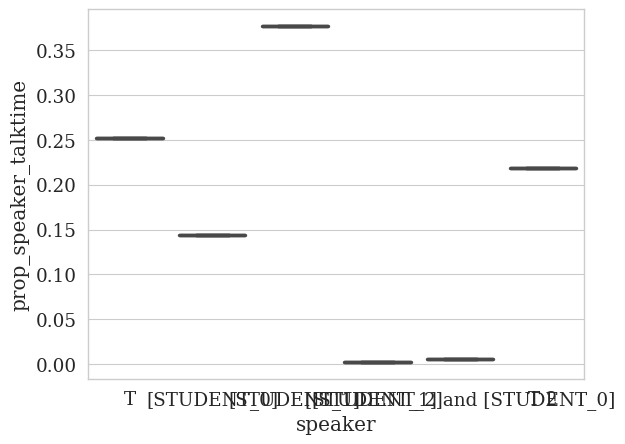

<Figure size 640x480 with 0 Axes>

In [ ]:
analyzer.plot_statistics(
    feature_column=TALK_TIME_COLUMN,
    df=df,
    speaker_column=SPEAKER_COLUMN,
    value_as="prop"
)

The speaker names are too long and so they overlap. We can fix this by creating a dictionary that maps the speaker names to shorter names:

Mapping: {'T': 'A', '[STUDENT_0]': 'B', '[STUDENT_1]': 'C', '[STUDENT_2]': 'D', '[STUDENT_1] and [STUDENT_0]': 'E', 'T 2': 'F'}


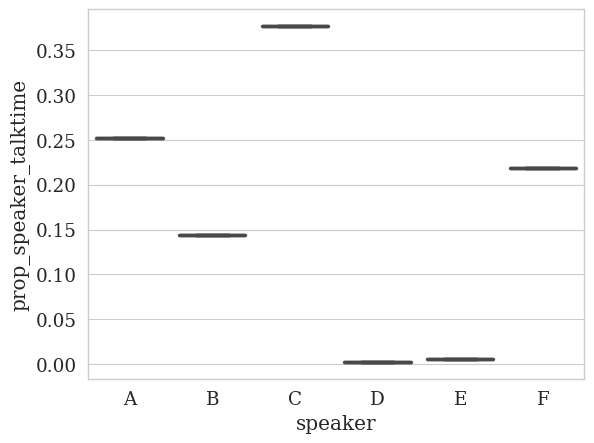

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create speaker mapping to A, B, C, D
label_mapping = {
    speaker: chr(ord('A') + i) for i, speaker in enumerate(df[SPEAKER_COLUMN].unique())
}

print(f"Mapping: {label_mapping}")

# Pass this mapping into the analyzer
analyzer.plot_statistics(
    # Everything else is the same
    feature_column=TALK_TIME_COLUMN,
    df=df,
    speaker_column=SPEAKER_COLUMN,
    value_as="prop",
    # We want to use the mapping we created
    label_mapping=label_mapping
)

🎉 Great, these simple examples show how we can report quantitative statistics on talk time.

The other statistics are similar to the example above for talk time. For conciseness, we will omit them here; but the only thing you need to do is change the `feature_column` argument to the feature you want to analyze.

We'll now move onto the `LexicalAnalyzer`.

## 💬 Lexical Analysis

A lexical analysis is an analysis on the words used in the data.
This is useful for understanding the low-level language (i.e., word usage) used by the student and educator.
While a lexical analysis may be too low-level for capturing e.g., the meaning of the discourse, it can be a useful first step in capturing language trends in the data.

We will give a simple demonstration of two features of the `LexicalAnalyzer`:
- Word Frequency: We will look at the most frequent words used by each speaker.
- Log-Odds: We will look at the log-odds of words used by each speaker (i.e., which words are more likely to be used by the student vs. the educator).

First, let's look at the most frequent words used by each speaker.

In [ ]:

import nltk
nltk.download("stopwords")

analyzer = LexicalAnalyzer()

analyzer.print_word_frequency(
    df=df,
    text_column=TEXT_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    # We want to look at the top 5 words
    topk=5,
    # We want to format the text e.g., remove punctuation and stopwords (https://en.wikipedia.org/wiki/Stop_word)
    run_text_formatting=True
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Words By Speaker
T
works: 6
one: 5
bigger: 4
models: 4
write: 3


[STUDENT_0]
one: 10
would: 5
third: 4
yeah: 3
bigger: 3


[STUDENT_1]
one: 16
two: 13
take: 9
put: 8
yeah: 8


[STUDENT_2]
one: 1
half: 1


[STUDENT_1] and [STUDENT_0]
well: 1
bigger: 1
one: 1


T 2
one: 9
two: 8
interesting: 5
okay: 4
twelfths: 4





🎉 Nice, that was easy!

💡 We can see that there's a lot of use of numbers and fractions ("one", "third"), in addition to comparison language ("bigger").

If you want to see the most frequent words overall, you can omit the `speaker_column` argument:

In [ ]:
analyzer.print_word_frequency(
    df=df,
    text_column=TEXT_COLUMN,
    # Bye! We don't care about the speaker anymore
    # speaker_column=SPEAKER_COLUMN,
    topk=5,
    run_text_formatting=True
)


one: 42
two: 25
bigger: 15
yeah: 12
sixth: 11



🎉 Great, this is a quick way to look at the most frequent words used by each speaker.

❓ Curious in looking into common n-grams for the speakers? Please refer to our [documentation](TODO) for more information.

Let's now move onto the log-odds analysis.

💡 Why a log-odds analysis?

Going beyond just counting frequent words in the student and teacher's utterances, we might be interested in the chances of a word occurring in the student's text over it occurring in the teacher's text.

This gets us to a log-odds analysis on the words. For more information on log-odds analysis, please refer to [this paper](https://languagelog.ldc.upenn.edu/myl/Monroe.pdf) which applied the same analysis to study language use in political speeches.


In order to run a log-odds analysis, we need to specify two groups of texts we want to compare to each other.
In this case, we are interested in comparing the student's text to the teacher's text.
So let's split our original dataframe into these two groups and pass them into the log-odds analysis.

In [ ]:
speakers = df[SPEAKER_COLUMN].unique()
# Student speakers are ones that contain STUDENT in their name
student_speakers = [speaker for speaker in speakers if "STUDENT" in speaker]
# Teacher speakers are all the other speakers
teacher_speakers = [speaker for speaker in speakers if speaker not in student_speakers]

# Now let's split the data frame into two data frames: one for student speakers and one for teacher speakers
student_df = df[df[SPEAKER_COLUMN].isin(student_speakers)]
teacher_df = df[df[SPEAKER_COLUMN].isin(teacher_speakers)]

# We can now run the analyzer:
analyzer.print_log_odds(
    df1=student_df,
    df2=teacher_df,
    text_column1=TEXT_COLUMN,
    text_column2=TEXT_COLUMN,
    # We want to look at the top 5 words
    topk=5,
    # We still want to format the text
    run_text_formatting=True
)


Top words for Group 1
put: 1.5082544501223418
yeah: 1.4243179151183505
third: 1.323889968245073
take: 1.2333974083596422
green: 1.1289734037070032


Top words for Group 2
works: -1.5890822958913073
models: -1.5890822958913073
interesting: -1.447190205063502
see: -1.291347559145683
okay: -1.291347559145683



🎉 Awesome, this shows us both the words and odds of the words used by the student (Group 1) and educator (Group 2).

We can also plot this with a similar function call:

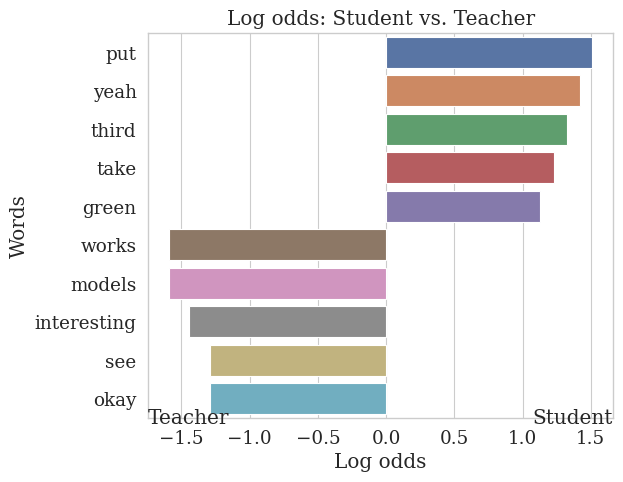

<Figure size 640x480 with 0 Axes>

In [ ]:

analyzer.plot_log_odds(
    df1=student_df,
    df2=teacher_df,
    text_column1=TEXT_COLUMN,
    text_column2=TEXT_COLUMN,
    topk=5,
    run_text_formatting=True,
    # We can pass plot labels for group 1 and 2
    group1_name="Student",
    group2_name="Teacher"
)

Neat, this concludes the tutorial on `LexicalAnalyzer`.
There are other features of the `LexicalAnalyzer` that we did not cover here such as reporting n-gram frequency or performing a log-odds analysis on n-grams.
For more information on these features, please refer to our [documentation](TODO).

We'll now move onto the last analyzer, the `TemporalAnalyzer`!

## 📈 Temporal Analysis

A temporal analysis is an analysis on the features over time.
We define time as the time over the course of the transcript.


Let's see how we can look at the talk time ratio (which we summarized before quantitatively) over time.
This setup will look similar to the quantitative analysis however the key difference is that we will specify a `num_bins` argument to specify the number of bins we want to split the transcript into.



Label mapping: {'T': 'A', '[STUDENT_0]': 'B', '[STUDENT_1]': 'C', '[STUDENT_2]': 'D', '[STUDENT_1] and [STUDENT_0]': 'E', 'T 2': 'F'}


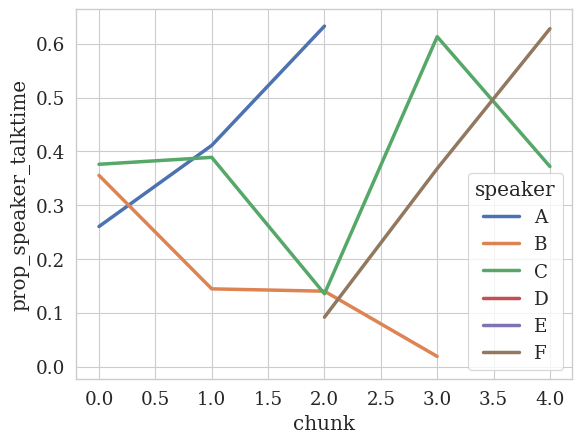

<Figure size 640x480 with 0 Axes>

In [ ]:
analyzer = TemporalAnalyzer()

# We'll use the same label mapping as before to abbreviate the speaker names
print(f"Label mapping: {label_mapping}")

analyzer.plot_temporal_statistics(
            feature_column=TALK_TIME_COLUMN,
            dfs=df,
            speaker_column=SPEAKER_COLUMN,
            # We want to see the proportion of talk time
            value_as="prop",
            # We will split the session into 5 bins
            num_bins=5,
            # We want to use the mapping we created
            label_mapping=label_mapping
        )


🎉 Plotting the temporal data was straightforward!

💡 There are some interesting observations, for example:
- Speaker B ([STUDENT_0]) decreases their talk time over time whereas
- Speaker C (the other student, [STUDENT_1]) has fluctuating talk time over time.


Let's also look at the conversational uptake over time. Remember that conversational uptake is looking at how the teacher builds on the student's contribution.
So we'll only see values on the teacher speaker, and not the students (that's how the feature was annotated).

Label mapping: {'T': 'A', '[STUDENT_0]': 'B', '[STUDENT_1]': 'C', '[STUDENT_2]': 'D', '[STUDENT_1] and [STUDENT_0]': 'E', 'T 2': 'F'}


/usr/local/lib/python3.10/dist-packages/edu_convokit/analyzers/temporal_analyzer.py:57: RuntimeWarning: invalid value encountered in double_scalars
  f"prop_speaker_{feature_column}": speaker_df[feature_column].sum() / feature_sum,


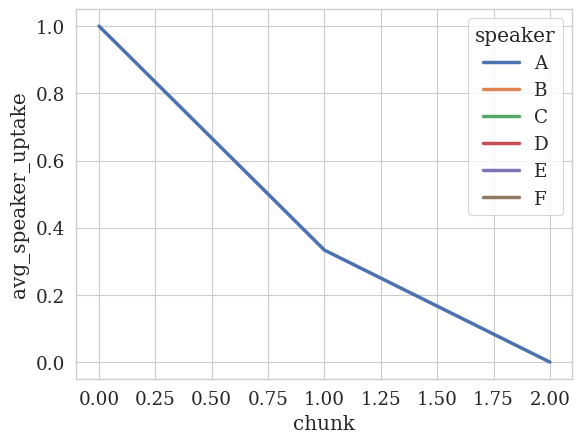

<Figure size 640x480 with 0 Axes>

In [ ]:
# We'll use the same label mapping as before to abbreviate the speaker names
print(f"Label mapping: {label_mapping}")

analyzer.plot_temporal_statistics(
            feature_column=UPTAKE_COLUMN,
            dfs=df,
            speaker_column=SPEAKER_COLUMN,
            # We want to see the average uptake (this is different from proportion: average looks at within-speaker average, whereas proportion looks at across-speaker average)
            value_as="avg",
            num_bins=5,
            label_mapping=label_mapping
        )

💡 Super interesting! In this transcript, we see that the teacher's conversational uptake _decreases_ over time.

This example shows how powerful a temporal analysis can be in understanding the data and how `TemporalAnalyzer` makes it easy to perform this analysis.
There are many other features that you can perform a temporal analysis on. For more information, please refer to our [documentation](TODO).

## Data Entry Points for Analyzer

In the previous sections, we looked at how to use the `Analyzer` modules on a single transcript.
However, you might be interested in analyzing multiple transcripts at once.
In this section, we will look at the different data entry points for the `Analyzer` modules.
We'll use the `TemporalAnalyzer` as an example for demonstrating the different data entry points.

### Single Transcript

In the previous example, we saw how to analyze a single transcript. We did this by loading the transcript into a dataframe and passing it into every function call of `TemporalAnalyzer` like:


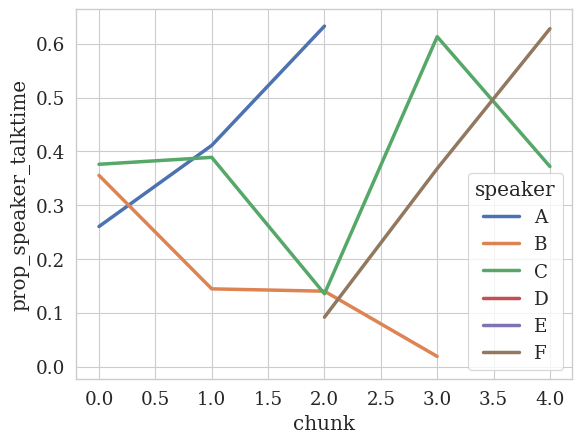

<Figure size 640x480 with 0 Axes>

In [ ]:
analyzer = TemporalAnalyzer()

analyzer.plot_temporal_statistics(
            feature_column=TALK_TIME_COLUMN,
            dfs=df,
            speaker_column=SPEAKER_COLUMN,
            value_as="prop",
            num_bins=5,
            label_mapping=label_mapping
        )

Another way, we could have done this is by passing either (a) the transcript file path or (b) dataframe into the `TemporalAnalyzer` constructor:

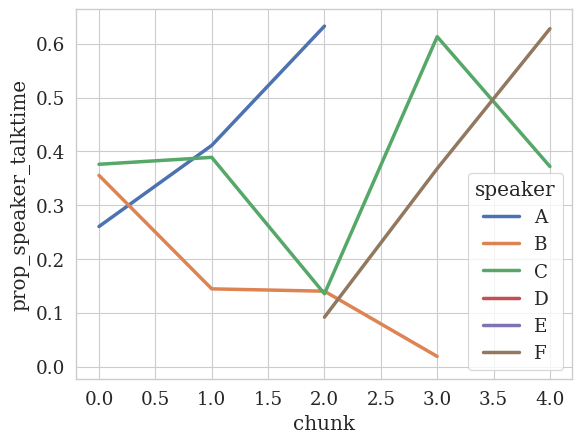

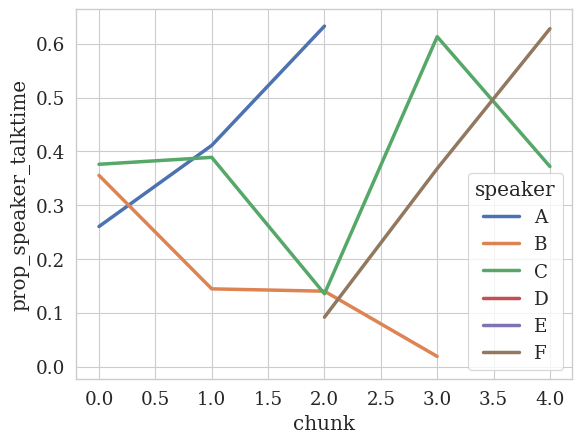

<Figure size 640x480 with 0 Axes>

In [ ]:
# (a) Passing in the filename
analyzer = TemporalAnalyzer(filenames=data_fname)

analyzer.plot_temporal_statistics(
            feature_column=TALK_TIME_COLUMN,
            # We don't need to pass in the data frame anymore
            # dfs=df,
            speaker_column=SPEAKER_COLUMN,
            value_as="prop",
            num_bins=5,
            label_mapping=label_mapping
        )

# (b) Passing in the data frame
analyzer = TemporalAnalyzer(dfs=df)

analyzer.plot_temporal_statistics(
            feature_column=TALK_TIME_COLUMN,
            # We don't need to pass in the data frame anymore
            # dfs=df,
            speaker_column=SPEAKER_COLUMN,
            value_as="prop",
            num_bins=5,
            label_mapping=label_mapping
        )


As expected, we get the same results as before.

### Data Directory

Let's say we have a directory of transcripts and we want to analyze all of them.
We can do this by passing the directory path into the `TemporalAnalyzer` constructor, and then analyzing the data:

In [ ]:
# Let's first prepare the data directory
DATA_DIR = "sample_data_colab"
!mkdir -p $DATA_DIR

# Let's download the data and save it to the data directory. We'll use three transcripts as examples.
!wget https://raw.githubusercontent.com/rosewang2008/edu-toolkit/master/data/analyzers/4244.csv -O $DATA_DIR/4244.csv
!wget https://raw.githubusercontent.com/rosewang2008/edu-toolkit/master/data/analyzers/4245.csv -O $DATA_DIR/4245.csv
!wget https://raw.githubusercontent.com/rosewang2008/edu-toolkit/master/data/analyzers/4246.csv -O $DATA_DIR/4246.csv



--2023-12-30 10:43:12--  https://raw.githubusercontent.com/rosewang2008/edu-toolkit/master/data/analyzers/4244.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27052 (26K) [text/plain]
Saving to: ‘sample_data_colab/4244.csv’

sample_data_colab/4 100%[===================>]  26.42K  --.-KB/s    in 0.002s  

2023-12-30 10:43:12 (15.8 MB/s) - ‘sample_data_colab/4244.csv’ saved [27052/27052]

--2023-12-30 10:43:12--  https://raw.githubusercontent.com/rosewang2008/edu-toolkit/master/data/analyzers/4245.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting respon

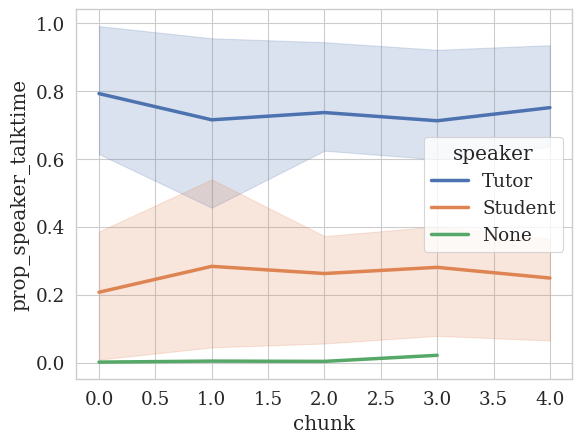

<Figure size 640x480 with 0 Axes>

In [ ]:
# Now let's analyze the data in this directory.
analyzer = TemporalAnalyzer(data_dir=DATA_DIR)

analyzer.plot_temporal_statistics(
    feature_column=TALK_TIME_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    value_as="prop",
    num_bins=5,
)

💡 Neat! On this directory of transcripts, we see that the talk time ratio is pretty consistent during the tutoring session: The Tutor talks about 80% of the time and the Student talks about 20% of the time.

There also seems to be a speaker named None --- this is coming from missing annotations in the Amber dataset: [link](https://github.com/rosewang2008/edu-toolkit/blob/main/data/analyzers/4245.csv).


### Multiple Transcripts

Let's say we have a list of _specific_ transcripts and we want to analyze them.
We can easily do this by passing the list of transcript file paths into the `TemporalAnalyzer` constructor, and then analyzing the data:

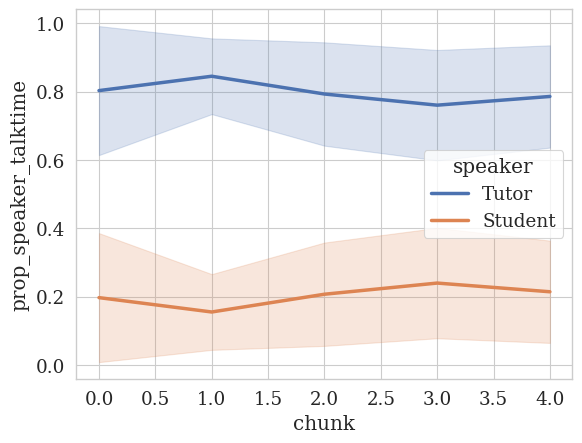

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
filenames = [
    # Let's just analyze two of the transcripts
    os.path.join(DATA_DIR, "4244.csv"),
    os.path.join(DATA_DIR, "4246.csv"),
]
analyzer = TemporalAnalyzer(filenames=filenames)

# Same function call
analyzer.plot_temporal_statistics(
    feature_column=TALK_TIME_COLUMN,
    speaker_column=SPEAKER_COLUMN,
    value_as="prop",
    num_bins=5,
)


## 📝 Conclusion and Where to Go From Here

In this tutorial, we learned how to use `Analyzer` to analyze our data. We learned how to use:
- 🔍 `QualitativeAnalyzer` to look at examples of annotations, such as student reasoning.
- 📊 `QuantitativeAnalyzer` to look at aggregate statistics on annotations, such as talk time.
- 💬 `LexicalAnalyzer` to look at the words used in the data, such as the most frequent words used by the student or the words that distinguish the student from the educator.
- 📈 `TemporalAnalyzer` to look at the annotations over time, such as the talk time ratio over time.

Additionally, we learned about the different data entry points for `Analyzer`, such as a single transcript, a directory of transcripts, or a list of transcripts.

This concludes the final general tutorial on `edu-toolkit`! 🎉


What are some natural next steps? If you are interested in seeing examples of these analyzers on **full** datasets, please check out our other tutorials where we apply everything to the:
- [NCTE dataset with an elementary math classroom data](https://colab.research.google.com/drive/1k3fn6uY4QRMtPUZN6hpMd6o-0g7fYotg)
- [TalkMoves dataset with a K-12 math classroom data](https://colab.research.google.com/drive/1qt_S3GjxIwXk6ONztbYAHeX8WHy1uxDd)
- [Amber dataset, with 8th/9th grade math tutoring data](https://colab.research.google.com/drive/1Q3anUPcemMils4cz2gwEwDdKCjEdm6T9)

For additional tutorials on `edu-toolkit`, please refer to our [documentation](https://edu-toolkit.readthedocs.io/en/latest/).

If you have any questions, please feel free to reach out to us on [`edu-toolkit`'s GitHub](https://github.com/rosewang2008/edu-toolkit).

👋 Happy exploring your data with `edu-toolkit`!